# 🧹Data Cleaning and Preprocessing


This notebook handles data cleaning and preprocessing steps necessary for building reliable models. Key operations include handling missing values, encoding categorical variables, and preparing the dataset for training and evaluation.


In [19]:
# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Data Cleaning

In [12]:
hotel_dataset = pd.read_csv('../data/hotel_bookings.csv')

In [13]:
hotel_dataset.shape

(36275, 19)

In [14]:
hotel_dataset.isna().sum().reset_index(name='missing')

,index,missing
0,Booking_ID,0
1,no_of_adults,413
2,no_of_children,324
3,no_of_weekend_nights,367
4,no_of_week_nights,807
5,type_of_meal_plan,526
6,required_car_parking_space,2592
7,room_type_reserved,1171
8,lead_time,472
9,arrival_year,378


The data contains significant number of missing field across all variables. 

In [15]:
hotel_dataset = hotel_dataset.dropna()

In [16]:
hotel_dataset.shape

(27511, 19)

Rows containing missing values were removed from the dataset instead of applying imputation techniques.

Given the ample size of the dataset, this approach preserves data integrity and avoids introducing potential biases from estimated values. Approximately 8,000 rows were removed during this process, leaving a final dataset of around 27,000 complete observations.

This ensures that all subsequent analyses and modeling are performed on complete and reliable data, maintaining the quality and robustness of the project.

### Changing Variables Types

In [17]:
# Drop Booking_ID
hotel_dataset = hotel_dataset.drop(columns=['Booking_ID'])

# Convert columns to category dtype
categorical_columns = [
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'arrival_year',
    'arrival_month',
    'arrival_date',
    'market_segment_type',
    'repeated_guest',
    'booking_status'
]

# Apply categorical type
hotel_dataset[categorical_columns] = hotel_dataset[categorical_columns].astype('category')


In [18]:
hotel_dataset.dtypes

no_of_adults                             float64
no_of_children                           float64
no_of_weekend_nights                     float64
no_of_week_nights                        float64
type_of_meal_plan                       category
required_car_parking_space              category
room_type_reserved                      category
lead_time                                float64
arrival_year                            category
arrival_month                           category
arrival_date                            category
market_segment_type                     category
repeated_guest                          category
no_of_previous_cancellations             float64
no_of_previous_bookings_not_canceled     float64
avg_price_per_room                       float64
no_of_special_requests                   float64
booking_status                          category
dtype: object

The booking_id variable was removed from the dataset, as it does not contribute to the analysis. Addition-
ally, categorical variables were converted into factors to ensure they are properly recognized and processed
in subsequent analyses.

### Outliers Analysis

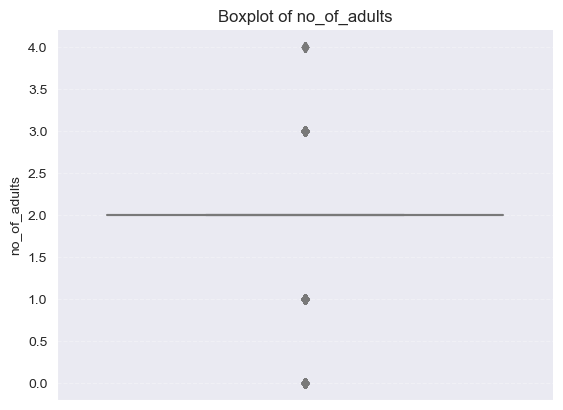

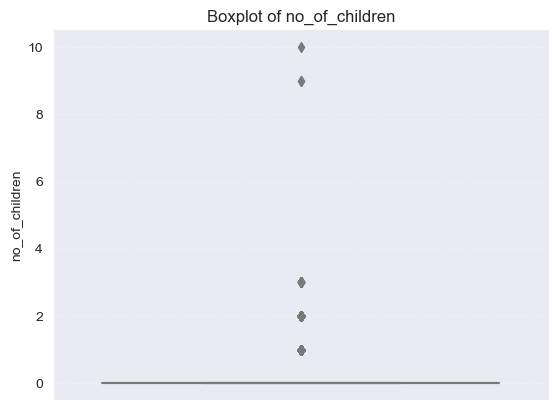

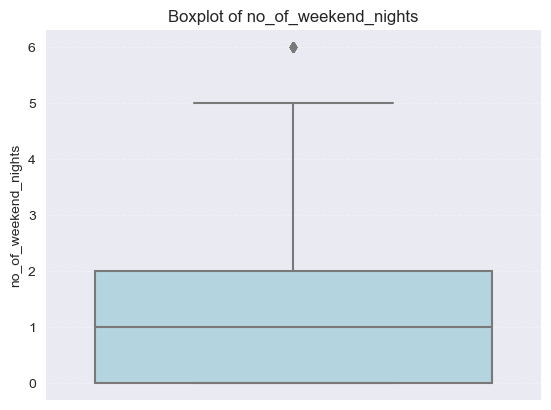

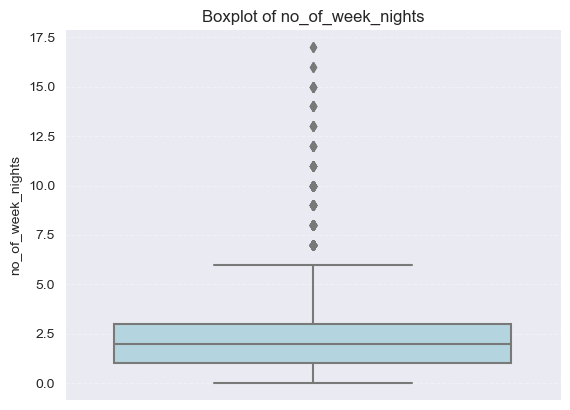

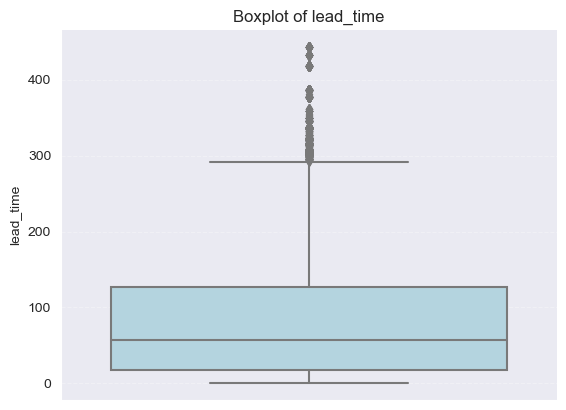

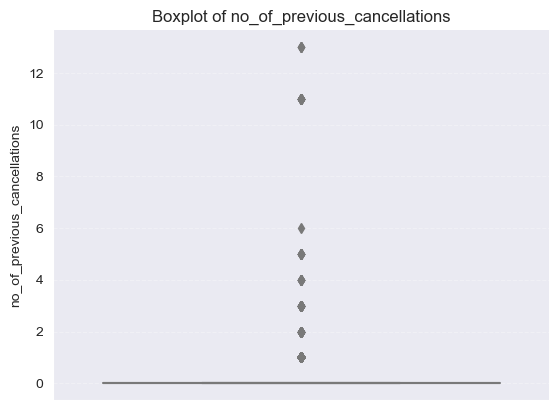

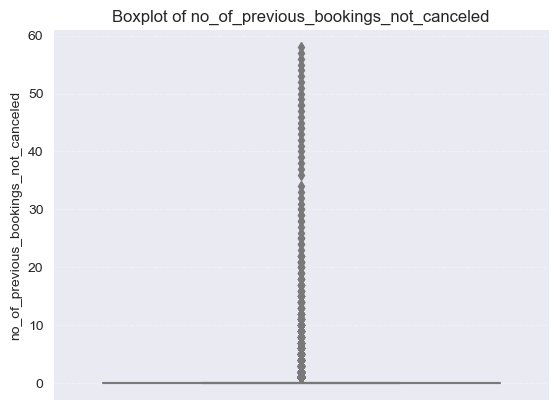

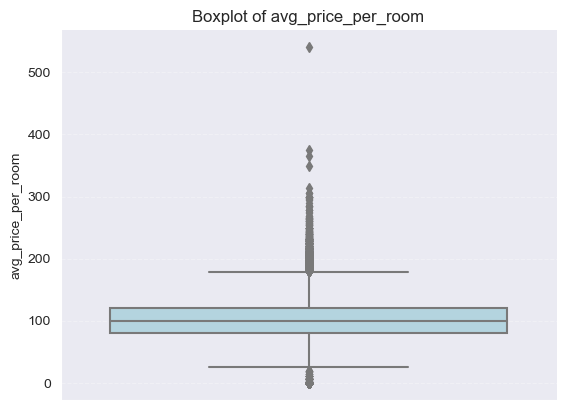

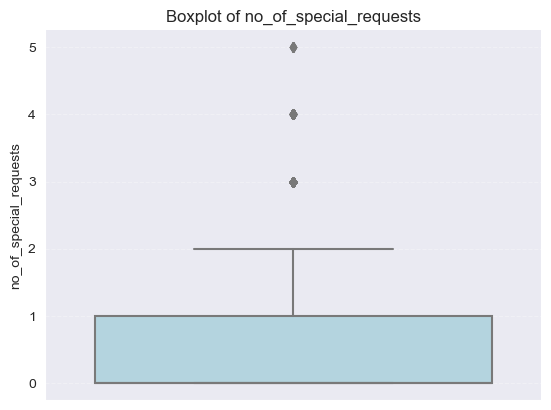

In [21]:
# Select numeric columns
numeric_cols = hotel_dataset.select_dtypes(include='number').columns

# Create boxplots for each numeric variable
for col in numeric_cols:
    fig, ax = plt.subplots()

    sns.boxplot(y=hotel_dataset[col], ax=ax, color='lightblue')

    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel(col)

    # Optional styling to match your project
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Uncomment to save each plot
    plt.savefig(f"../plots/outliers/boxplot_{col}.png", dpi=300, bbox_inches='tight')

    plt.show()
